# Sales Analyser
- Sales Analyser is a program that helps to analyze sales and generate insights from sales data, trends, and metrics to set targets.
- It provides insights about the top performing and underperforming products, the problems in selling and market opportunities, and sales activities that generate revenue.
- By analysing sales, it process datasets to usable form and helps a company to improve their sales strategy. 

# Prerequisites
## In order to run this program we have install some libraries:
- Pandas
- Numpy
- Matplotlib
- Seaborn

In [1]:
pip install pandas

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install seaborn

# Dataset
The dataset are 12 csv files for each month sales data of a e-commerce electronics company, downloaded from Kaggle. Dataset are concatenante and have approx 1.9 lakh orders data. Dataset contain null values and some unmatch data types also, the program automatically change them accordingly.

# Import Data

In [5]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
from matplotlib import pylab as plt
sns.set_palette(['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])

In [6]:
files = [file for file in os.listdir('D:\Mukund\Open Source Lab\Sales Analyser\dataset')] 
df = pd.DataFrame()
for i in files:
    data = pd.read_csv('dataset/'+i)
    df = pd.concat([df,data],axis=0)
df.shape

(186850, 6)

# Data Cleaning

In [7]:
df = df[df['Order ID'] != 'Order ID']

In [8]:
df = df.reset_index()
df = df.drop(columns='index')

In [9]:
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
24667,242746,Lightning Charging Cable,1,14.95,08/01/19 10:21,"348 Jefferson St, New York City, NY 10001"
39535,304455,Vareebadd Phone,1,400,12/24/19 12:46,"120 North St, New York City, NY 10001"
125457,199047,34in Ultrawide Monitor,1,379.99,05/26/19 17:35,"182 Center St, New York City, NY 10001"
13436,189391,USB-C Charging Cable,1,11.95,04/03/19 15:09,"165 Johnson St, San Francisco, CA 94016"
164938,269358,AAA Batteries (4-pack),1,2.99,10/03/19 15:40,"857 Adams St, Atlanta, GA 30301"
133363,206584,Lightning Charging Cable,1,14.95,05/11/19 23:11,"576 6th St, Atlanta, GA 30301"
125774,199350,AA Batteries (4-pack),1,3.84,05/06/19 19:37,"597 Spruce St, San Francisco, CA 94016"
83900,229403,34in Ultrawide Monitor,1,379.99,07/28/19 20:57,"191 7th St, San Francisco, CA 94016"
162406,266946,27in 4K Gaming Monitor,1,389.99,10/17/19 17:20,"706 West St, Seattle, WA 98101"
94677,212979,Flatscreen TV,1,300,06/01/19 12:05,"35 Cherry St, San Francisco, CA 94016"


# Checking Data Types & Removing Null Values

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186495 entries, 0 to 186494
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
dtypes: object(6)
memory usage: 8.5+ MB


In [11]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [12]:
df[df.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
734,NaN,NaN,NaN,NaN,NaN,NaN
1430,NaN,NaN,NaN,NaN,NaN,NaN
1550,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184825,NaN,NaN,NaN,NaN,NaN,NaN
185087,NaN,NaN,NaN,NaN,NaN,NaN
185690,NaN,NaN,NaN,NaN,NaN,NaN
186196,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df = df.dropna()

# Data Preparation

In [31]:
df['Quantity Ordered'] = df['Quantity Ordered'].astype('int64')
df['Price Each'] = df['Price Each'].astype('float')
df['Order Date'] = pd.to_datetime(df['Order Date'])

In [15]:
def feature_extraction(data):

    def get_city(address):
        return address.split(',')[1]
    
    def get_state(address):
        return address.split(',')[2].split(' ')[1]

    data['Year'] = data['Order Date'].dt.year
    
    data['Month'] = data['Order Date'].dt.month
    
    data['Hour'] = data['Order Date'].dt.hour 
    
    data['Minute'] = data['Order Date'].dt.minute 
    
    data['Sales'] = data['Quantity Ordered'] * data['Price Each'] 
    
    data['Cities'] = data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})") 
    
    return data 

In [16]:
df = feature_extraction(df)
df.sample(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Year,Month,Hour,Minute,Sales,Cities
168337,272594,Apple Airpods Headphones,1,150.00,2019-10-25 10:33:00,"907 Jackson St, San Francisco, CA 94016",2019,10,10,33,150.00,San Francisco (CA)
76081,149502,USB-C Charging Cable,1,11.95,2019-01-18 18:31:00,"14 12th St, San Francisco, CA 94016",2019,1,18,31,11.95,San Francisco (CA)
13571,189520,Wired Headphones,1,11.99,2019-04-29 21:22:00,"736 South St, New York City, NY 10001",2019,4,21,22,11.99,New York City (NY)
86412,231816,ThinkPad Laptop,1,999.99,2019-07-13 23:36:00,"42 Spruce St, Los Angeles, CA 90001",2019,7,23,36,999.99,Los Angeles (CA)
103732,221650,Lightning Charging Cable,1,14.95,2019-06-27 11:54:00,"546 Hickory St, Austin, TX 73301",2019,6,11,54,14.95,Austin (TX)
38580,303540,Bose SoundSport Headphones,1,99.99,2019-12-05 09:48:00,"529 South St, Boston, MA 02215",2019,12,9,48,99.99,Boston (MA)
64091,158814,USB-C Charging Cable,1,11.95,2019-02-16 12:12:00,"73 Madison St, San Francisco, CA 94016",2019,2,12,12,11.95,San Francisco (CA)
58337,153306,Lightning Charging Cable,1,14.95,2019-02-19 18:33:00,"691 13th St, New York City, NY 10001",2019,2,18,33,14.95,New York City (NY)
82242,227812,Wired Headphones,1,11.99,2019-07-02 13:29:00,"27 Forest St, Los Angeles, CA 90001",2019,7,13,29,11.99,Los Angeles (CA)
100160,218231,USB-C Charging Cable,1,11.95,2019-06-06 10:52:00,"761 Elm St, Portland, OR 97035",2019,6,10,52,11.95,Portland (OR)


# Analysis

## Descriptive Analysis
Descriptive Analysis is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.

In [17]:
df.describe()

,Quantity Ordered,Price Each,Order Date,Year,Month,Hour,Minute,Sales
count,185950.000000,185950.000000,185950,185950.000000,185950.000000,185950.000000,185950.000000,185950.000000
mean,1.124383,184.399735,2019-07-18 21:54:38.887550464,2019.000183,7.059140,14.413305,29.481361,185.490917
min,1.000000,2.990000,2019-01-01 03:07:00,2019.000000,1.000000,0.000000,0.000000,2.990000
25%,1.000000,11.950000,2019-04-16 21:05:15,2019.000000,4.000000,11.000000,14.000000,11.950000
50%,1.000000,14.950000,2019-07-17 20:40:30,2019.000000,7.000000,15.000000,29.000000,14.950000
75%,1.000000,150.000000,2019-10-26 08:14:00,2019.000000,10.000000,19.000000,45.000000,150.000000
max,9.000000,1700.000000,2020-01-01 05:13:00,2020.000000,12.000000,23.000000,59.000000,3400.000000
std,0.442793,332.731330,NaN,0.013521,3.502996,5.423416,17.317573,332.919771


- Customer mostly order 1 item at once, some small group order 2 item at once, highest order are in 9 item at once.
- Sales for each order are in range 2.99 to 3400.
- Distribution for sales and Price Each relatively same it is because most quantity order is 1.

In [18]:
total_year_order = df.shape[0]
total_product_sold = df['Quantity Ordered'].sum()
total_year_sales = df['Sales'].sum()

print(f'Total Orders in 2019 : {total_year_order:,} orders')
print(f'Total Products sold in 2019 : {total_product_sold:,} items')
print(f'Total Sales in 2019 : {total_year_sales:,} USD')

Total Orders in 2019 : 185,950 orders
Total Products sold in 2019 : 209,079 items
Total Sales in 2019 : 34,492,035.97 USD


Summary sales 2019, total revenue 34,483,365.68 USD, 185,916 orders and 209,038 items sold.

## Univariate Analysis
Univariate Analysis is basically the simplest form to analyze data. The major reason for univariate analysis is to use the data to describe. The analysis will take data, summarise it, and then find some pattern in the data.

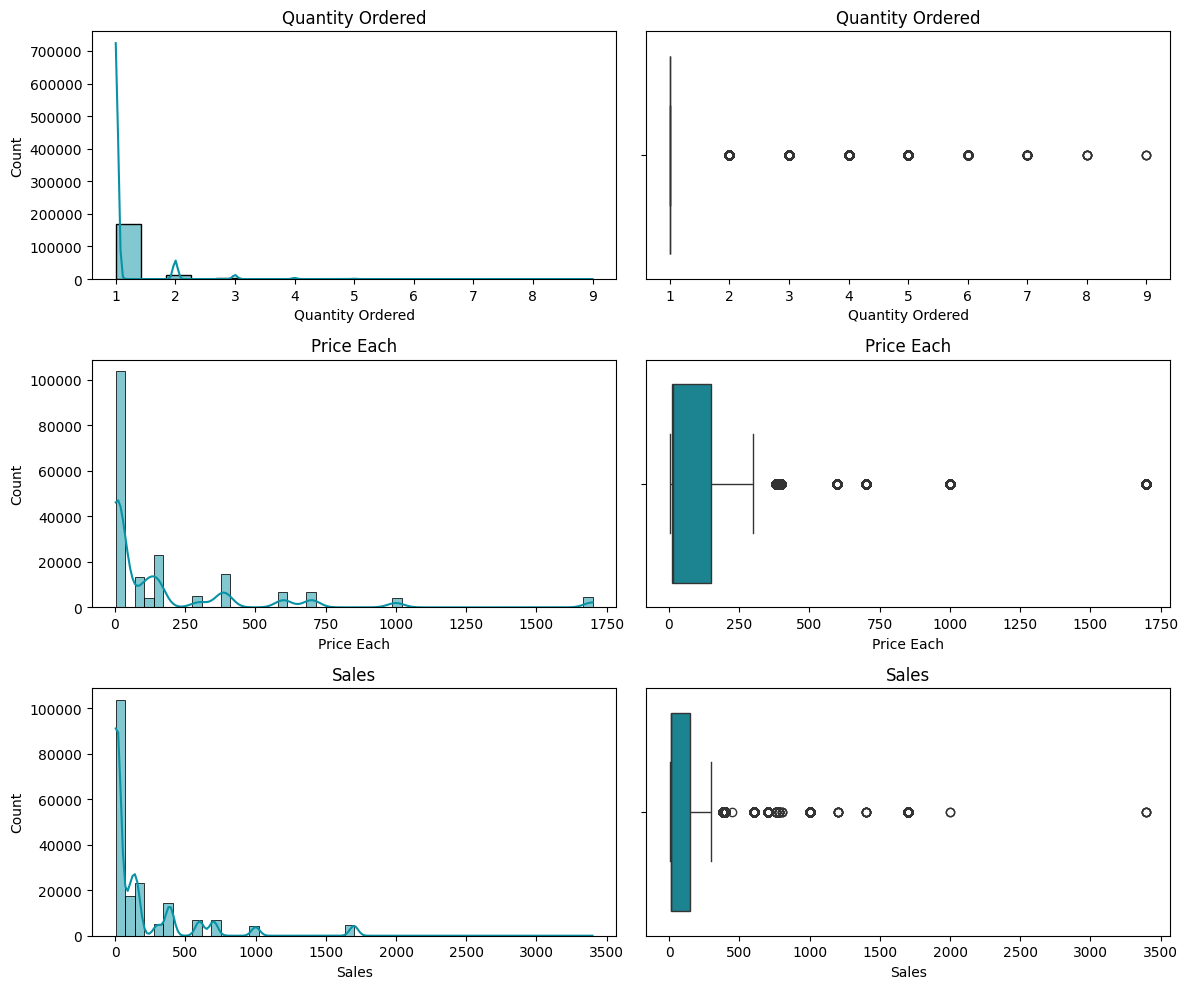

In [19]:
fig, ax = plt.subplots(3,2, figsize=(12,10))
sns.histplot(data=df,x='Quantity Ordered',kde=True,ax=ax[0,0])
sns.histplot(data=df,x='Price Each',kde=True,ax=ax[1,0],bins=50)
sns.histplot(data=df,x='Sales',kde=True,ax=ax[2,0],bins=50)

ax[0,0].set_title('Quantity Ordered')
ax[1,0].set_title('Price Each')
ax[2,0].set_title('Sales')

sns.boxplot(data=df,x='Quantity Ordered',ax=ax[0,1])
sns.boxplot(data=df,x='Price Each',ax=ax[1,1])
sns.boxplot(data=df,x='Sales',ax=ax[2,1])

ax[0,1].set_title('Quantity Ordered')
ax[1,1].set_title('Price Each')
ax[2,1].set_title('Sales')

plt.tight_layout()
plt.show()

Interpretation :
- Mostly customer buys 1 item, some small protion buy 2 items once and customer buys more than 2 is rare.
- Price per item mostly in range 11.95 to 150.00.
- Sales range are 11.95 to 150.00.

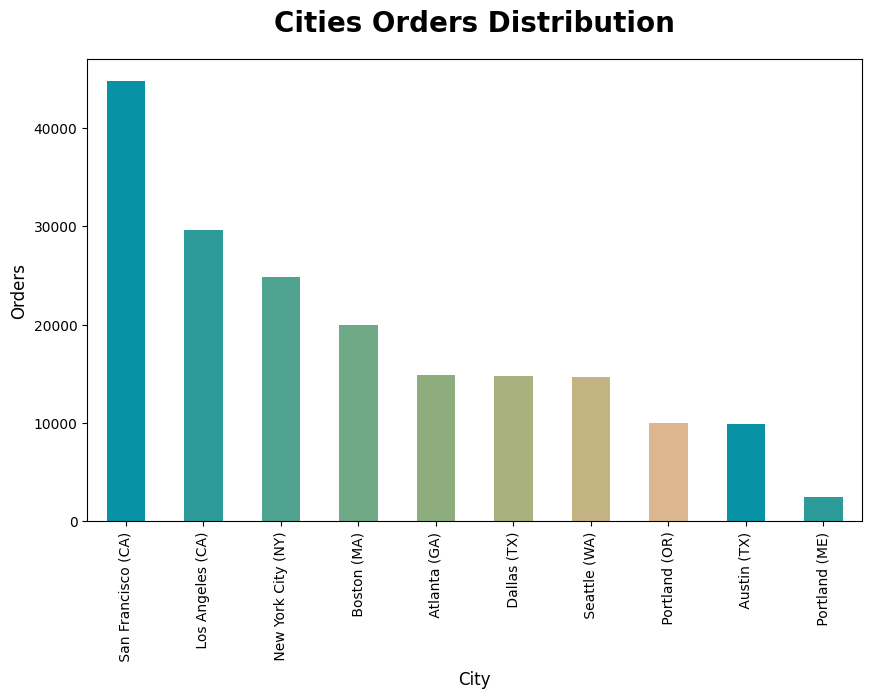

In [20]:
plt.figure(figsize=(10,6))
df['Cities'].value_counts().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Cities Orders Distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('City',fontsize=12)
plt.show()

Most of orders are from California (CA) specificly from San Francisco and Los Angeles around more than 40,000 and 30,000 orders. Average orders in cities are around 18,000 orders.

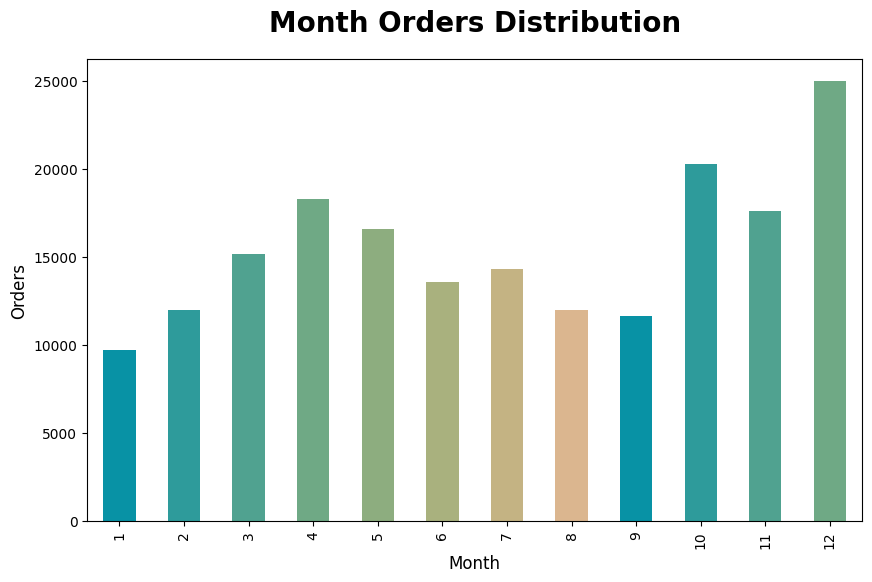

In [21]:
plt.figure(figsize=(10,6))
df['Month'].value_counts().sort_index().plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Month Orders Distribution',weight='bold',fontsize=20,pad=20)
plt.ylabel('Orders',fontsize=12)
plt.xlabel('Month',fontsize=12)
plt.show()

High order are happend in December and October that have 25,000 and 20,000 orders. There is increasing order in January to April then decrease to September.

## Multivariate Analysis
Multivariate Analysis is defined as: The statistical study of data where multiple measurements are made on each experimental unit and where the relationships among multivariate measurements and their structure are important.

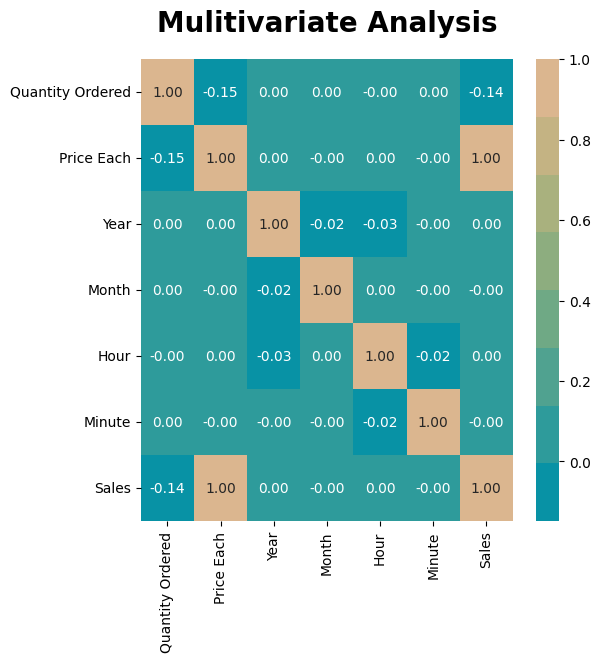

In [22]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
plt.figure(figsize=(6, 6))
plt.title('Mulitivariate Analysis',weight='bold',fontsize=20,pad=20)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.show()

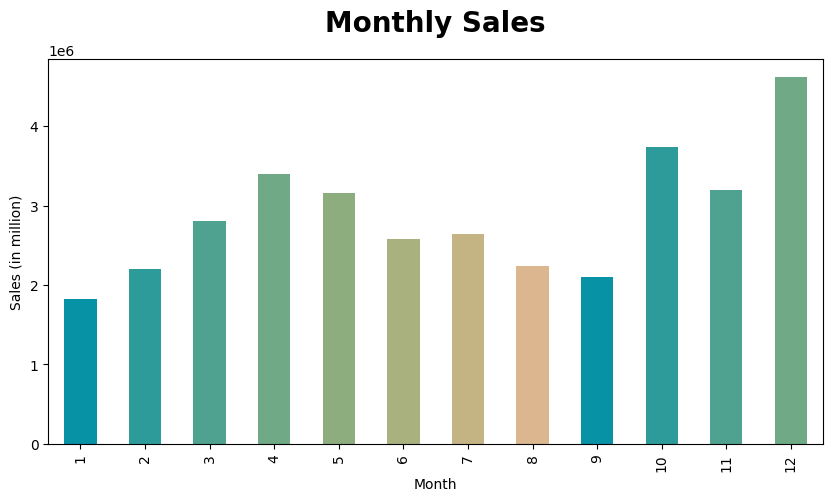

In [23]:
df_month = df.groupby('Month')['Sales'].sum()
plt.figure(figsize=(10,5))
df_month.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Monthly Sales',weight='bold',fontsize=20,pad=20)
plt.ylabel('Sales (in million)')
plt.show()

Highest orders are placed in December and October - 4.5 million and 3.5 million respectively. There is increasing order in January to April then decrease to September.

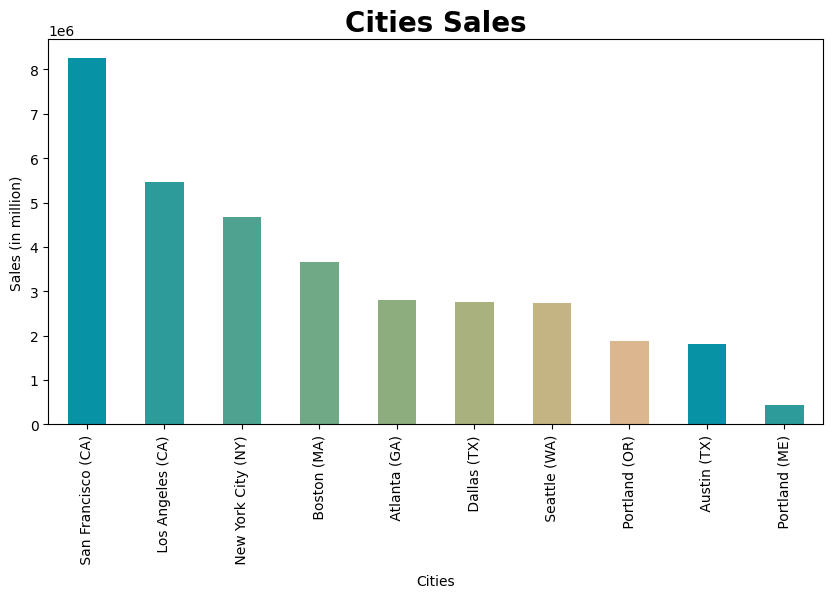

In [24]:
df_city = df.groupby('Cities')['Sales'].sum()
plt.figure(figsize=(10,5))
df_city.sort_values(ascending=False).plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Cities Sales',weight='bold',fontsize=20)
plt.ylabel('Sales (in million)')
plt.show()

Highest sales are from San Francisco around 8.1 million.

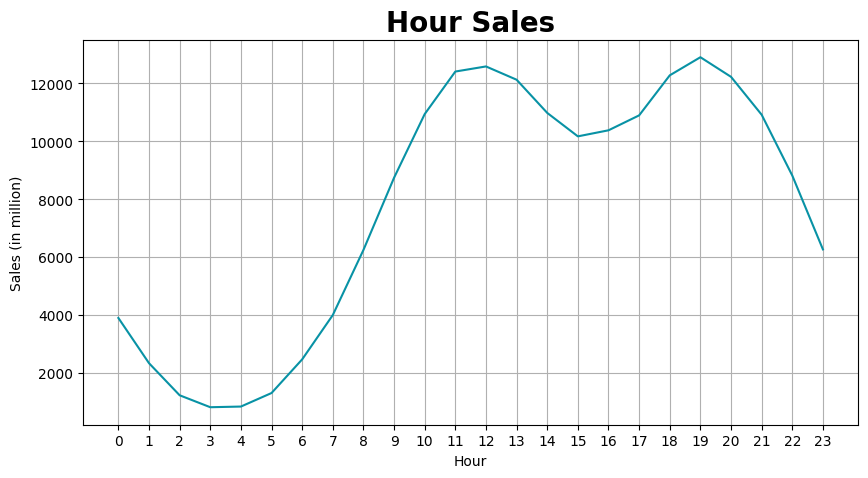

In [25]:
df_hour = df.groupby('Hour')['Quantity Ordered'].count()
plt.figure(figsize=(10,5))
plt.plot(df_hour.index,df_hour.values)
plt.title('Hour Sales',weight='bold',fontsize=20)
plt.grid(True)
plt.xticks(ticks=df_hour.index)
plt.ylabel('Sales (in million)')
plt.xlabel('Hour')
plt.show()

There is peak of sales in around 9:00 to 21:00. This pattern can be a good spot to promote products to increase more sales.

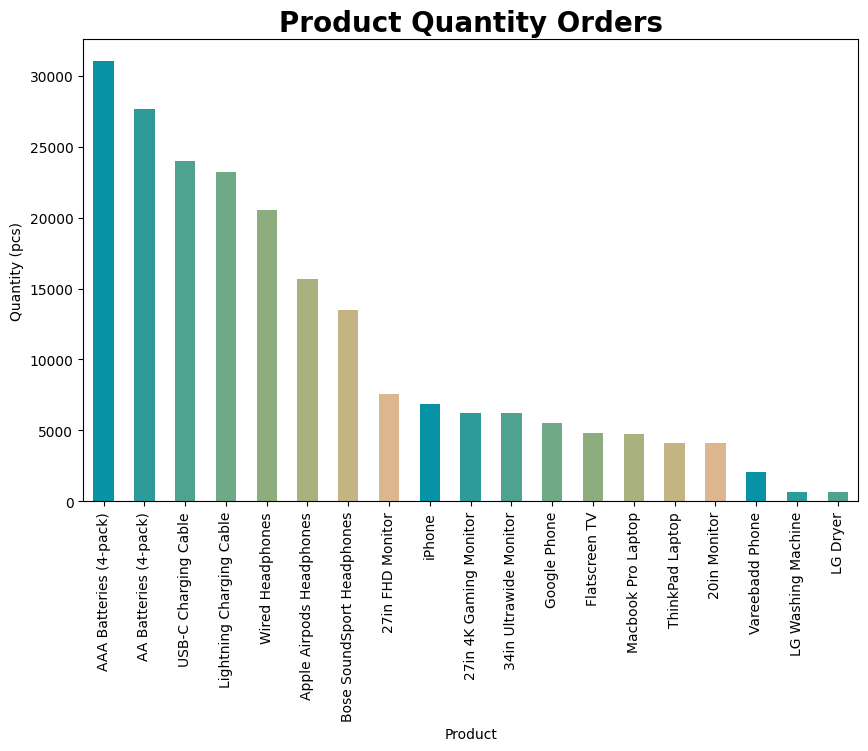

In [26]:
df_product = df.groupby('Product')['Quantity Ordered'].sum()
df_product = df_product.sort_values(ascending=False)

plt.figure(figsize=(10,6))
df_product.plot(kind='bar',color=['#0892a5','#2e9b9b','#50a290','#6fa985','#8dad7f','#a9b17e','#c4b383','#dbb68f'])
plt.title('Product Quantity Orders',weight='bold',fontsize=20)

plt.ylabel('Quantity (pcs)')

plt.show()

Top product sold are on Battery products, then followed by Charging Cable, and Headphones.

## Market Basket Analysis
Market Basket Analysis is a data mining technique used by retailers to increase sales by better understanding customer purchasing patterns. It involves analyzing large data sets, such as purchase history, to reveal product groupings, as well as products that are likely to be purchased together.

In [32]:
from itertools import combinations
from collections import Counter

data = df[df['Order ID'].duplicated(keep=False)]
data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
data = data[['Order ID', 'Grouped']].drop_duplicates()
count = Counter()
for row in data['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


C:\Users\mukun\AppData\Local\Temp\ipykernel_13040\9893147.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


From combination data above we can recommend some bundle for customer to increase sales.
1. iPhone bundle :
   iPhone buyers likely to buy Lightning Charging Cable, Wired Headphones or Apple Airpods Headphones. So in bundle we can give some choices:
     - iPhone + Lightning Charging Cable + Wired Headphones
     - iPhone + Lightning Charging Cable + Apple Airpods Headphones
2. Google Phone Bundle :
   Google Phone buyers likely to buy USB-C Charging Cable, Wired Headphones,Bose SoundSport Headphones. So in bundle we can give some choices:
   - Google Phone + USB-C Charging Cable + Wired Headphones
   - Google Phone + USB-C Charging Cable + Bose SoundSport Headphones

## Purchase Probability

In [28]:
def proba_prod(product):
    product_size = df.shape[0]
    product_size1 = df[df.Product == product]
    product_size_ = product_size1.shape[0]
    prob_year = round(product_size_/product_size*100,2)
    
    product_month = []
    product_month1 = []
    prob_month = []
    for i in range(1,13):
        prod_size = df[df['Month']==i].shape[0]
        product_month.append(prod_size)
        prod_size1 = product_size1[product_size1['Month']==i].shape[0]
        product_month1.append(prod_size1)
    for a,b in zip(product_month1, product_month):
        prob = round(a/b,3)
        prob_month.append(prob)
    return np.array(prob_month),prob_year

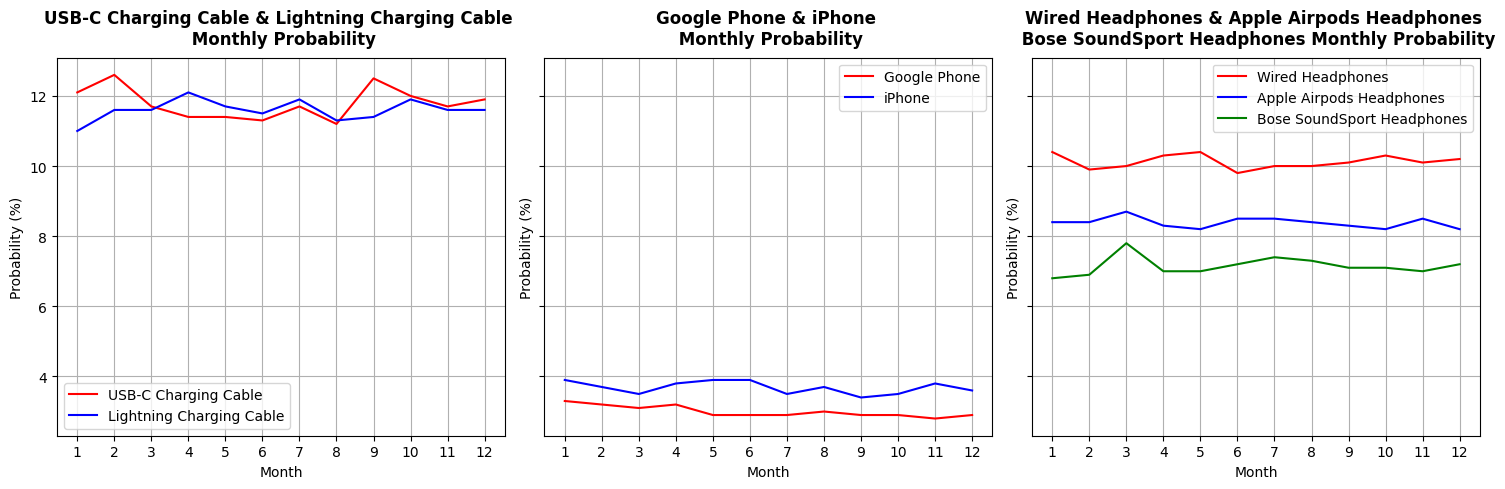

Probability in year USB-C Charging Cable : 11.78
Probability in year Lightning Charging Cable : 11.65
Probability in year Google Phone : 2.97
Probability in year iPhone : 3.68
Probability in year Wired Headphones : 10.15
Probability in year Apple Airpods Headphones : 8.36
Probability in year Bose SoundSport Headphones : 7.17


In [29]:
fig, ax = plt.subplots(1,3,figsize=(15,5),sharey=True)
prod1 = 'USB-C Charging Cable'
ax[0].plot(range(1,13),(proba_prod(prod1)[0]*100),label='USB-C Charging Cable',color='r')
prod2 = 'Lightning Charging Cable'
ax[0].plot(range(1,13),(proba_prod(prod2)[0]*100),label='Lightning Charging Cable',color='b')
# ax[0].set_ylim(0,15)
ax[0].set_title(f'{prod1} & {prod2} \n Monthly Probability',weight='bold',fontsize=12,pad=10)
ax[0].grid()
ax[0].set_xticks(range(1,13))
ax[0].set_xlabel('Month')
ax[0].set_ylabel('Probability (%)')
ax[0].legend()

prod1 = 'Google Phone'
ax[1].plot(range(1,13),(proba_prod(prod1)[0]*100),label='Google Phone',color='r')
prod2 = 'iPhone'
ax[1].plot(range(1,13),(proba_prod(prod2)[0]*100),label='iPhone',color='b')
# ax[1].set_ylim(0,6)
ax[1].set_title(f'{prod1} & {prod2} \n Monthly Probability',weight='bold',fontsize=12,pad=10)
ax[1].grid(True)
ax[1].set_xticks(range(1,13))
ax[1].set_xlabel('Month')
ax[1].set_ylabel('Probability (%)')
ax[1].legend()

prod1 = 'Wired Headphones'
ax[2].plot(range(1,13),(proba_prod(prod1)[0]*100),label='Wired Headphones',color='r')
prod2 = 'Apple Airpods Headphones'
ax[2].plot(range(1,13),(proba_prod(prod2)[0]*100),label='Apple Airpods Headphones',color='b')
prod3 = 'Bose SoundSport Headphones'
ax[2].plot(range(1,13),(proba_prod(prod3)[0]*100),label='Bose SoundSport Headphones',color='g')
# ax[2].set_ylim(0,12)
ax[2].set_title(f'{prod1} & {prod2} \n {prod3} Monthly Probability',weight='bold',fontsize=12,pad=10)
ax[2].grid(True)
ax[2].set_xticks(range(1,13))
ax[2].set_xlabel('Month')
ax[2].set_ylabel('Probability (%)')
ax[2].legend()

plt.tight_layout()
plt.show()

prods =['USB-C Charging Cable', 'Lightning Charging Cable','Google Phone','iPhone',
        'Wired Headphones','Apple Airpods Headphones','Bose SoundSport Headphones']
for i in prods:
    print(f'Probability in year {i} : {proba_prod(i)[1]}')

Probability for next customer will order the product are different for each products, so i simplify based on product type:
1. Charging cable <br>
    USB-C and Lightning cable have close probability which is aroung 11%
2. Phones <br>
    iPhone have higher chances to get orders than Google Phones.
3. Headphones <br>
    From 3 types of Headphones, Wired, Apple Airpods and Bose. Wired Headphones have highest probability to get ordered on next customer.

# Summary

In [30]:
print(f'Total orders in 2019 : {total_year_order:,} orders')
print(f'Total products sold in 2019 : {total_product_sold:,} items')
print(f'Total sales in 2019 : {total_year_sales:,} USD')

Total orders in 2019 : 185,950 orders
Total products sold in 2019 : 209,079 items
Total sales in 2019 : 34,492,035.97 USD


Analysis result for E-commerce sales data :

1. Summary metrics :
    - Total orders in 2019 : 185,916 orders
    - Total products sold in 2019 : 209,038 items
    - Total sales in 2019 : 34,483,365.68 USD
    - Sales range are 11.95 to 150.00.
    - Most of orders are from San Francisco (CA) with 40,000 orders and 8,1 million sales. 
    - Average orders in cities are around 18,000 orders.

2. Customer behavior :
    - Mostly customer order 1 item, some small protion buy 2 items once and customer buys more than 2 is rare.
    - There is peak of sales in around 9:00 to 21:00. This data can be potentialy became support to post advertising on that time.
    - Most product sold are on Battery products, then followed by Charging Cable, and Headphones.
    - High sales are happend in December that have 25,000 orders and 4,5 million sales . There is increasing order in January to April then decrease to September.

3. Bundle recommendation to increasing sales :
    * iPhone bundle :
       iPhone buyers likely to buy Lightning Charging Cable, Wired Headphones or Apple Airpods Headphones. So in bundle we can give some choices:
         - iPhone + Lightning Charging Cable + Wired Headphones
         - iPhone + Lightning Charging Cable + Apple Airpods Headphones
    * Google Phone Bundle :
       Google Phone buyers likely to buy USB-C Charging Cable, Wired Headphones,Bose SoundSport Headphones. So in bundle we can give some choices:
       - Google Phone + USB-C Charging Cable + Wired Headphones
       - Google Phone + USB-C Charging Cable + Bose SoundSport Headphones

4. Probability order on product type:
    - Charging cable <br>
    USB-C and Lightning cable have close probability which is around 11%
    - Phones <br>
    iPhone have higher chances to get orders (3.68%) than Google Phones (2.97%).
    - Headphones <br>
    From 3 types of Headphones, Wired, Apple Airpods and Bose. Wired Headphones have highest probability (10.16%) to get ordered on next customer.